In [5]:
from google.colab import drive

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [13]:
companies = pd.read_csv('/content/gdrive/My Drive/At a glance: Critical Care Unit/1000_Companies.csv')
X = companies.iloc[:,:-1].values
y = companies.iloc[:,4].values

In [14]:
companies.head()

R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94

<ipython-input-15-12caec5e304d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(companies.corr())


<Axes: >

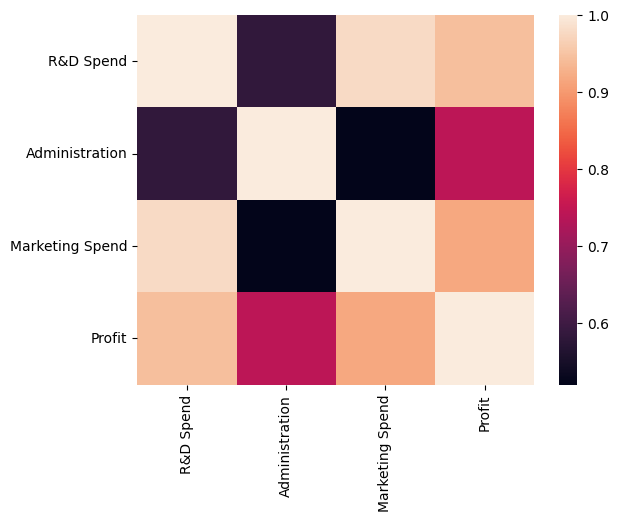

In [15]:
sns.heatmap(companies.corr())

In [30]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
labelencoder = LabelEncoder()
X[:, 3] = labelencoder.fit_transform(X[:, 3])

onehotencoder = OneHotEncoder(categorical_features = [4])
X = onehotencoder.fit_transform(X).toarray()
print(X)

IndexError: ignored

In [18]:
X = X[:,1:]

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

In [21]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [23]:
y_pred = regressor.predict(X_test)
print(y_pred)

[ 90209.64901318  88876.28325862  95200.74973042 174739.58503941
  84013.74722284 110572.81423949 169438.58451208  91855.1682484
 163402.29005648  54991.76617392  67874.72481309 150180.9861358
 126512.60670878  60430.86889281 175991.46628657  76097.46542299
 118577.95366564 163338.33779446 165329.70854714 180487.66382609
 101238.40282718  86180.18269683 179933.75346041  84689.06190888
 105088.13051962 101399.34780971  40828.42858138  58070.59626831
  69777.85472814 226802.72627013 121052.52594777 111658.45981284
 101689.86321283 137852.59801618  64960.45224275 108854.95146996
 184345.94907957 170595.15880734 173725.92497117 118014.06326024
  97038.60706862 164196.76013804 107746.47058118  52030.50278345
 116882.08703837  59741.11018494 157857.27897357  79750.07622713
 159139.45816291 131182.41311202 183735.81760226 173691.52102156
  94077.16471212  79055.37228415 179193.73688257  85539.18255677
 142685.10466661 169290.41285941  84946.0123958  105424.79762652
 141471.73344522  53812.888

In [24]:
print(regressor.coef_)

[   1.04239904    0.35510511 -320.45531609]


In [25]:
print(regressor.intercept_)

-88623.76527343772


In [26]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8985038788872521